## Problem

Write the kNN (k-nearest-neighbors) classification algorithm

- **Input**: X, y, k
- **Output**: kNN classifier

In [10]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [3]:
# Data setup
X0 = np.random.normal(loc=0, scale=2, size=(15, 2))
X1 = np.random.normal(loc=5, scale=3, size=(10, 2))
X2 = np.random.normal(loc=10, scale=2, size=(20, 2))

y0 = np.zeros((15, 1))
y1 = np.ones((10, 1))
y2 = np.ones((20, 1)) * 2

X = np.vstack([X0, X1, X2])
y = np.vstack([y0, y1, y2])

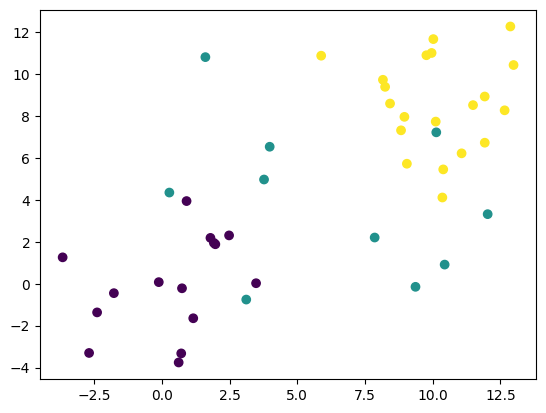

In [4]:
# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y)

## Solution/Implementation

In [34]:
class kNNClassifier:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def calc_distances(self, x):
        return np.linalg.norm(self.X_train - x, axis=1)

    def predict(self, X):
        N = X.shape[0]
        preds = np.zeros((N, 1))
        for i, x in enumerate(X):
            distances = self.calc_distances(x)
            topk = np.argsort(distances)[:self.k]
            topk_y = self.y_train[topk].flatten()
            label = Counter(topk_y).most_common()[0][0]
            preds[i] = label
        return preds

In [43]:
classifier = kNNClassifier()
classifier.fit(X, y)

y_pred = classifier.predict(X)
acc = np.mean(y_pred == y)
print(f"Accuracy on training set: {acc:.4f}")

Accuracy on training set: 0.8889


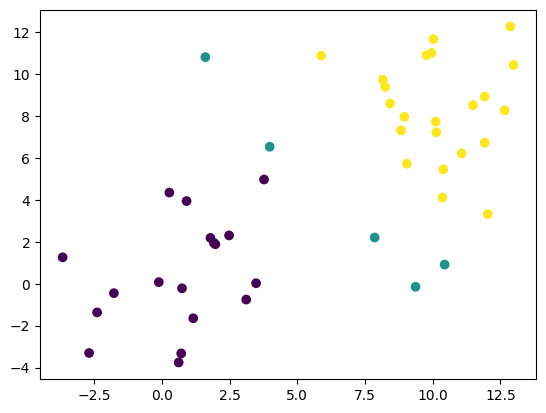

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()